In [53]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      2.1.0
asttokens                    2.4.1
astunparse                   1.6.3
certifi                      2024.2.2
charset-normalizer           3.3.2
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.2.0
cycler                       0.12.1
debugpy                      1.8.1
decorator                    5.1.1
executing                    2.0.1
flatbuffers                  24.3.7
fonttools                    4.50.0
gast                         0.5.4
google-pasta                 0.2.0
grpcio                       1.62.1
h5py                         3.10.0
idna                         3.6
ipykernel                    6.29.3
ipython                      8.22.2
jedi                         0.19.1
jupyter_client               8.6.1
jupyter_core                 5.7.2
keras                        3.1.1
kiwisolver                   1.4.5
lib

In [54]:
import tensorflow as tf
import os

In [55]:
gpus = tf.config.experimental.list_physical_devices('CPU')

In [56]:
len(gpus)

1

In [57]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

Remove Dodgy Image

In [58]:
import cv2
import imghdr #checking image extension
from matplotlib import pyplot as plt


In [59]:
data_dir = 'data'

In [60]:
image_exst = ['jpeg', 'jpg', 'bmp', 'png']

In [61]:
for image in os.listdir(data_dir):
    print(image)

Happy
sad


In [62]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)

05-12-21-happy-people.jpg
1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg
1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg
11-Habits-of-Supremely-Happy-People-1.jpg
170404-happy-workers-feature.jpg
1HEoLBLidT2u4mhJ0oiDgig.png
20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg
220px-Happy_People_A_Year_in_the_Taiga_poster.jpg
35438_hd.jpg
360_F_313450534_bHkt5SoetREYpgWO5uOpceVnaDCngOX7.jpg
360_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg
4239f3d51d092f69d529f372a37b4601-1024x341.jpg
56f455011e0000b300705475.jpeg
7-principles-of-successful-and-happy-people.png
71hBPTAhIXL._AC_UF10001000_QL80_.jpg
89ca5d41335b4f9207b9cf03538a7dbd63497e474912837562cb9f58809ac32f.png
960x0.jpg
A_Sep20_14_1189155141.jpg
business-people-succesful-celebrating-group-successful-39416686-800x500.jpg
community-young-people-happy-together_23-2148431416.jpg
compassion-900x387.jpg
Couple_Happy_money_062618.jpg
diverse-happy-people-united-concept-101678776.jpg
es_27x40_pre_final_en

In [63]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        print(image_path)

data\Happy\05-12-21-happy-people.jpg
data\Happy\1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg
data\Happy\1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg
data\Happy\11-Habits-of-Supremely-Happy-People-1.jpg
data\Happy\170404-happy-workers-feature.jpg
data\Happy\1HEoLBLidT2u4mhJ0oiDgig.png
data\Happy\20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg
data\Happy\220px-Happy_People_A_Year_in_the_Taiga_poster.jpg
data\Happy\35438_hd.jpg
data\Happy\360_F_313450534_bHkt5SoetREYpgWO5uOpceVnaDCngOX7.jpg
data\Happy\360_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg
data\Happy\4239f3d51d092f69d529f372a37b4601-1024x341.jpg
data\Happy\56f455011e0000b300705475.jpeg
data\Happy\7-principles-of-successful-and-happy-people.png
data\Happy\71hBPTAhIXL._AC_UF10001000_QL80_.jpg
data\Happy\89ca5d41335b4f9207b9cf03538a7dbd63497e474912837562cb9f58809ac32f.png
data\Happy\960x0.jpg
data\Happy\A_Sep20_14_1189155141.jpg
data\Happy\business-people-succesful-celebrating-group-suc

In [64]:
image = cv2.imread(os.path.join('data', 'happy','35438_hd.jpg'))

In [65]:
image.shape

(649, 1240, 3)

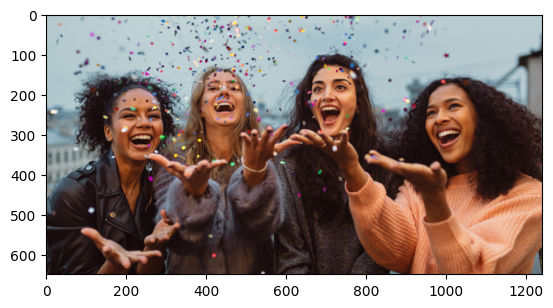

In [66]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB)) # Converting image from bgr to rgb 
plt.show()

In [67]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exst:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except print(0):
            pass

Load Data

In [68]:
import numpy as np
from matplotlib import pyplot as plt

In [69]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [70]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)
Source:   
@keras_export(
    [
        "keras.utils.image_dataset_from_directory",
        "keras.preprocessing.image_dataset_from_directory",
    ]
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    ve

In [71]:
data = tf.keras.utils.image_dataset_from_directory('data') ## automatically reshape the image size

Found 169 files belonging to 2 classes.


In [72]:
data_iterator = data.as_numpy_iterator()

In [73]:
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x000002D1B29A6410>)

In [74]:
batch = data_iterator.next()

In [75]:
batch[0]

array([[[[9.20312500e+01, 9.90312500e+01, 9.10312500e+01],
         [9.25937500e+01, 9.95937500e+01, 9.15937500e+01],
         [9.10000000e+01, 9.80000000e+01, 9.00000000e+01],
         ...,
         [1.67000000e+02, 1.85000000e+02, 1.85000000e+02],
         [1.68000000e+02, 1.86000000e+02, 1.86000000e+02],
         [1.68000000e+02, 1.86000000e+02, 1.86000000e+02]],

        [[8.50937500e+01, 9.20937500e+01, 8.40937500e+01],
         [8.65312500e+01, 9.35312500e+01, 8.55312500e+01],
         [8.78750000e+01, 9.48750000e+01, 8.68750000e+01],
         ...,
         [1.67000000e+02, 1.85000000e+02, 1.85000000e+02],
         [1.68000000e+02, 1.86000000e+02, 1.86000000e+02],
         [1.68000000e+02, 1.86000000e+02, 1.86000000e+02]],

        [[7.52812500e+01, 8.22812500e+01, 7.42812500e+01],
         [8.28437500e+01, 8.98437500e+01, 8.18437500e+01],
         [9.07500000e+01, 9.77500000e+01, 8.97500000e+01],
         ...,
         [1.67000000e+02, 1.85000000e+02, 1.85000000e+02],
         [

In [76]:
len(batch) ## is mean 2 classes

2

In [77]:
batch[0].shape ## separate into 32 batch and image size become 256/256 and 3 channel color
# this represented as numpy array

(32, 256, 256, 3)

In [78]:
batch[1] # represented as label for the image

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

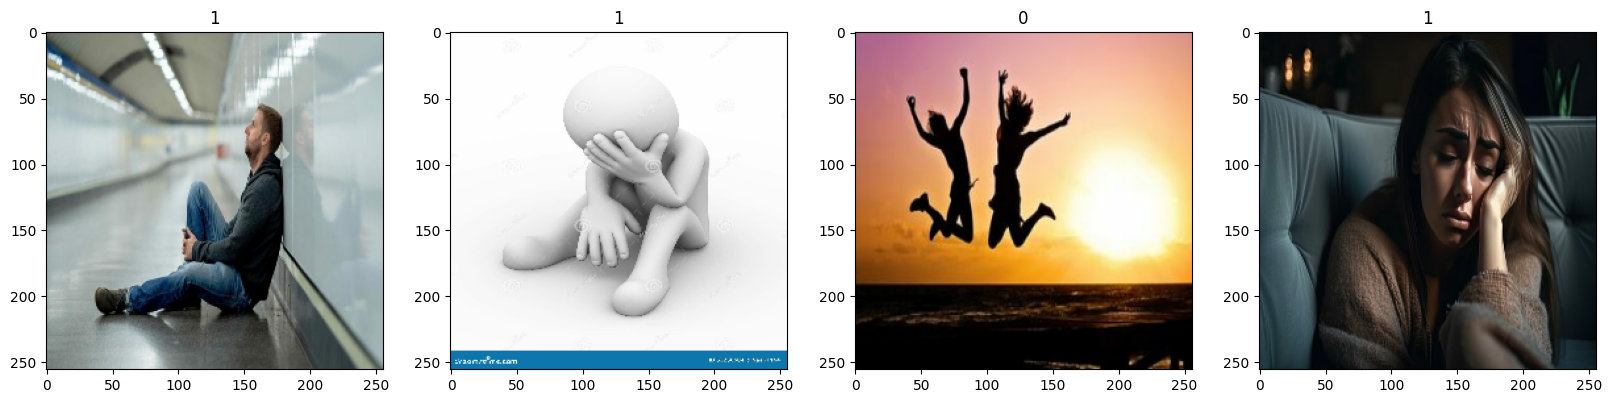

In [79]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Preprocess Data

1. scale data

In [80]:
data = data.map(lambda x, y: (x/255, y))

In [81]:
scaled_iterator = data.as_numpy_iterator()

In [82]:
batch = scaled_iterator.next()

In [83]:
batch[0].max()

1.0

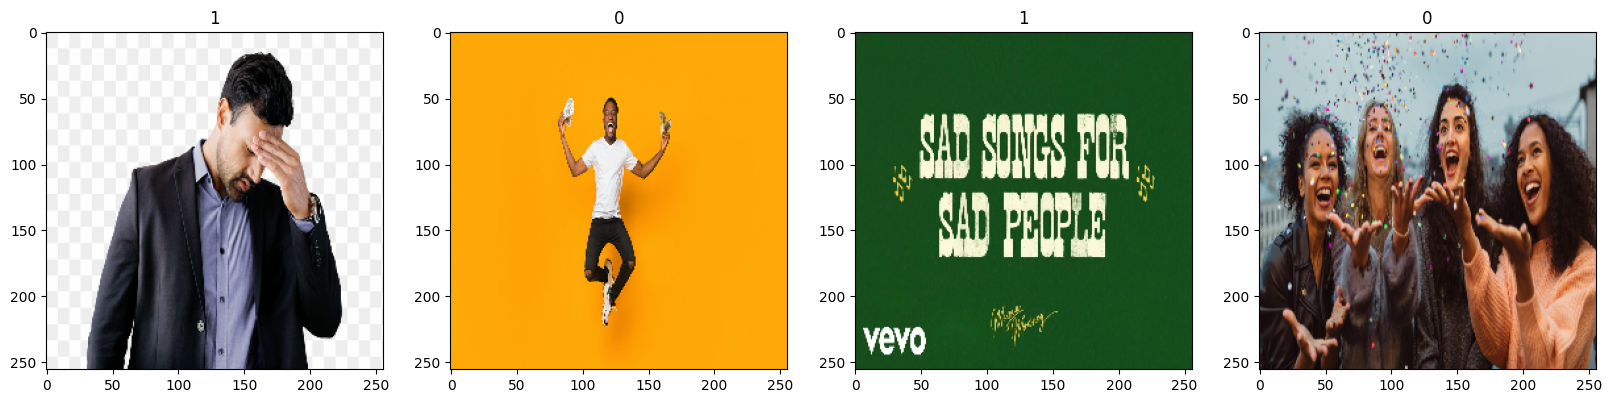

In [85]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

2. split data

In [86]:
len(data) # total batch is 6, each bathces has 32 image

6

In [96]:
train_size = int(len(data)*.6)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [101]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [108]:
len(train) + len(val) + len(test)

6

# Deep Model

1. Build Deep Learning Model

In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [110]:
model = Sequential()

In [112]:
# First layer is going to be 16 filters with 3,3 every pixels image and go with 1 by 1 and we input the image with 256,256,3 as we scaled the data into that shape, relu is giving back the value if the input value is positive and giving me 0 if the value is negatif.
model.add(Conv2D(16,(3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\Ridho\Videos\ComputerVision\image_classification_project\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [113]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [114]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 252, 252, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 126, 126, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 124, 124, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,698,945 (14.11 MB)

 Trainable params: 3,698,945 (14.11 MB)

 Non-trainable params: 0 (0.00 B)

2. Train

In [115]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [116]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.5846 - loss: 0.6798 - val_accuracy: 0.5156 - val_loss: 0.7379
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 888ms/step - accuracy: 0.4974 - loss: 0.7154 - val_accuracy: 0.5312 - val_loss: 0.6277
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 952ms/step - accuracy: 0.5964 - loss: 0.5829 - val_accuracy: 0.7188 - val_loss: 0.5724
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 872ms/step - accuracy: 0.8008 - loss: 0.5092 - val_accuracy: 0.8750 - val_loss: 0.4083
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 848ms/step - accuracy: 0.7643 - loss: 0.4841 - val_accuracy: 0.8594 - val_loss: 0.3949
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8724 - loss: 0.3832 - val_accuracy: 0.9062 - val_loss: 0.3296
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 920ms/step - accuracy: 0.8971 - loss: 0.3419 - val_accuracy: 0.9062 - val_loss: 0.3917
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 901ms/step - accuracy: 0.9323 - loss: 0.2713 - val_accuracy: 0.8750 - val_loss: 0.323

3. Plot Performance

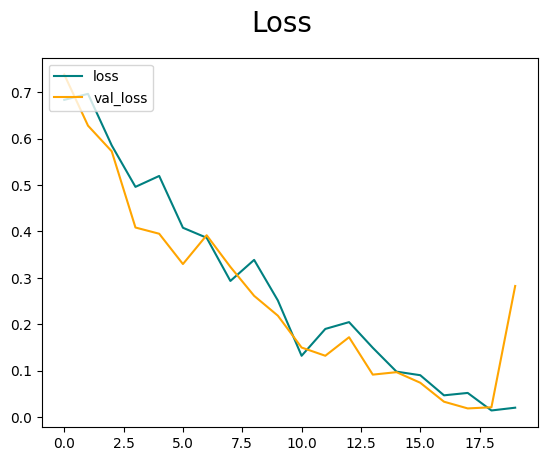

In [123]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()


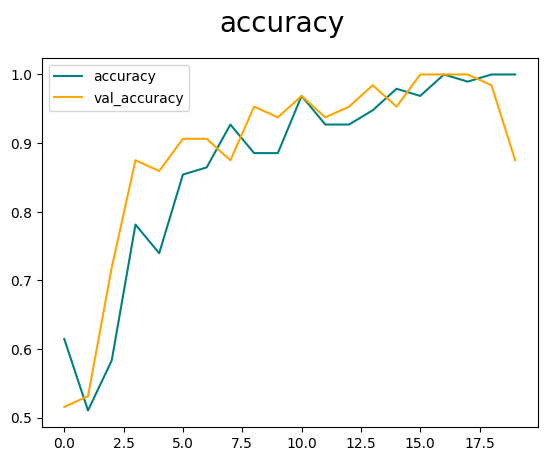

In [124]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()


# Evaluate the Performance

In [125]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy 

In [126]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [127]:
for batch in test.as_numpy_iterator():
    x,y = batch
    yhat = model.predict(x)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


In [129]:
print(f'Presicion:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Presicion:1.0, Recall:1.0, Accuracy:1.0


# Test

In [130]:
import cv2

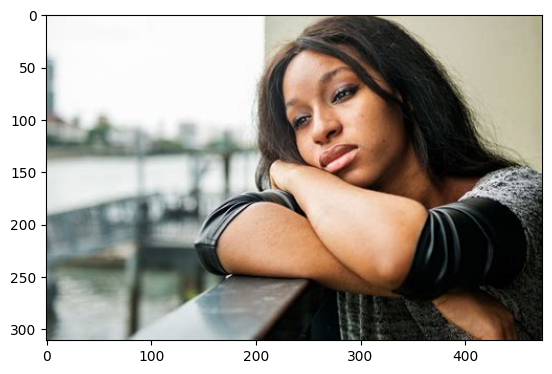

In [146]:
img = cv2.imread('sadtest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

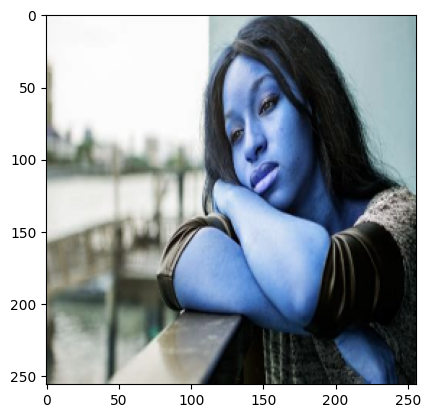

In [147]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [148]:
resize.shape

TensorShape([256, 256, 3])

In [149]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [150]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [153]:
yhat
# every value near to 0 is happy and value near to 1 is sad
# every value lower than 0.50 is predicted to happy and value more than 0.50 predicted as sad

array([[0.9991078]], dtype=float32)

In [155]:
if yhat < 0.5:
    print('Predicted as a happy')
else:
    print('Predicted as a sad')

Predicted as a sad


# Save Model

In [156]:
from tensorflow.keras.models import load_model

In [157]:
model.save(os.path.join('models', 'happysadmodel.h5'))

In [158]:
newmodel = load_model(os.path.join('models', 'happysadmodel.h5'))

In [159]:
yhatnew = newmodel.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


In [160]:
if yhatnew > 0.5:
    print('Predict as a sad')
else:
    print('Predict as a happy')

Predict as a sad
